In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('ab_test.csv')

In [ ]:
# DESCRIPTION

# The data is the results of an A/B test made by an e-commerce website
# It includes the total number of subjects and how many of them were converted both for the two pages



# DATA

# The data is taken from Kaggle
# https://www.kaggle.com/ahmedmohameddawoud/ecommerce-ab-testing



# GOAL

# To conduct an A/B test to determine whether an observed effect is within the range of chance variation



# METHODS: 

# To achive the goal the permutation test is used


In [474]:
# ASSUMPTIONS

# Because of the lack of information how the data was collected the assumptions are:

# 1) - Subjects were randomly assigned to treatments

# 2) - There was no sample bias

# 3) - The new web page was assumed to be better than the old one


In [4]:

# You can see the old web page is nearly 1.2% better for conversion than the new web page

ct = pd.crosstab(data['con_treat'],data['converted'])

conv_rate1 = ct.iloc[0,1] / sum(ct.iloc[0]) * 100 

conv_rate2 = ct.iloc[1,1] / sum(ct.iloc[1]) * 100

(conv_rate2 - conv_rate1) / conv_rate1 * 100


-1.2289118596614772

In [9]:
ct

converted,0,1
con_treat,,
control,129479,17723
treatment,129762,17514


In [12]:

# The observed effect can be calculated as the difference between the conversions rates

effect = conv_rate2 - conv_rate1

effect

-0.14795997940775507

In [6]:

# The data is big enough to make accurate decisions and the coversions results are comparable to the number of data points
# However, the observed effect is small so it's necessary to use a resampling procedure to find out whether the difference
# in conversions is within the range of chance variation

# A null hypothesis is that there is no difference between the observed effect and what chance might produce

# It's important to specify an alpha level in advance. The alpha level for this A/B test equils 5%.

conversion = [0] * sum(ct.iloc[:,0])

conversion.extend([1] * sum(ct.iloc[:,1]))

conversion = pd.Series(conversion)



# Here is the function to draw out two resamples and calculate the difference

def perm_fun(x, n):
    
    resample_1 = x.sample(n = n)
    
    resample_2 = x.drop(resample_1.index)
    
    return (resample_2.mean() - resample_1.mean()) * 100



# Using the for loop to get a permutation distribution of the test statistic

perm_diffs = [perm_fun(conversion, sum(ct.iloc[0])) for _ in range(1000)]


Text(0, 0.5, 'Frequency')

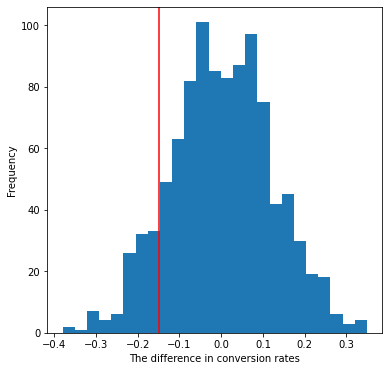

In [7]:
# In the graph you can see the value of the observed effect (the red line) is not far away from the range of chance variation

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)

ax.hist(perm_diffs, bins = 25)

ax.axvline(x=effect, color='red', lw=1.5)

ax.set_xlabel('The difference in conversion rates')

ax.set_ylabel('Frequency')



In [13]:
# It's not obvious in the graph whether the observed effect is statistically significant.
# Let's estimate a p-value from the permutation test results

np.mean([diff < effect for diff in perm_diffs])

# After running the code the p-values is 0.111. 
# (You can have another value but if you haven't changed other parameters your result won't be much different.)

# In this case, the p-value equaled 0.111 means that either the same or the more extreme observed effect can be achived 
# roughly 11.1% of the time which is more than the alpha level of 5% for single sided test.


0.111